# CAUSAL ANALYSIS OF WORLD HAPPINESS DATA

[Kaggle World Happiness](https://www.kaggle.com/unsdsn/world-happiness)

[World Happiness Report](https://worldhappiness.report)

## IMPORT WORLD HAPPINESS DATA

In [103]:
ls

Analysis.R             Happiness.ipynb        Raw Data/
Happiness Index.Rproj  Project Data/


In [104]:
import pandas as pd
import pandas_profiling as pp
import numpy as np

In [105]:
# Read in data, which is also used in the R project
data = pd.read_csv('./Project Data/happiness_train.csv')
data.head(5)

,rowname,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_of_corruption
0,Switzerland_2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland_2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark_2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway_2015,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada_2015,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [106]:
data.describe()

,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_of_corruption
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,5.369778,0.916880,1.046323,0.584162,0.415917,0.200668,0.155517
std,1.131287,0.407416,0.329032,0.242117,0.154977,0.126407,0.124996
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.497000,0.605000,0.848290,0.404000,0.310560,0.106130,0.063283
50%,5.303000,0.982409,1.081418,0.632106,0.434770,0.182590,0.117350
75%,6.173000,1.233748,1.284025,0.773610,0.539000,0.271254,0.218430
max,7.632000,1.870766,1.644000,1.030000,0.724000,0.838075,0.819710


In [107]:
# Drop sensitive or unused features
drop_col = ['rowname']
data = data.drop(columns=drop_col)
data.head(5)

,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_of_corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [109]:
data = data.rename(columns = {"gdp_per_capita":"GPD per Capita", 
                              "social_support": "Social Support", 
                              "healthy_life_expectancy":"Healthy Life Expectancy",
                              "freedom_life_choices":"Freedom Life Choices",
                              "generosity":"Generosity",
                              "perceptions_of_corruption":"Perceptions of Corruption"})
data

,score,GPD per Capita,Social Support,Healthy Life Expectancy,Freedom Life Choices,Generosity,Perceptions of Corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...
620,3.355,0.44200,1.07300,0.34300,0.24400,0.08300,0.06400
621,3.303,0.45500,0.99100,0.38100,0.48100,0.27000,0.09700
622,3.254,0.33700,0.60800,0.17700,0.11200,0.22400,0.10600
623,3.083,0.02400,0.00000,0.01000,0.30500,0.21800,0.03800


## CHANGE NON-NUMERIC TO NUMERIC (there are none)

In [114]:
import numpy as np

In [115]:
struct_data = data.copy()

In [116]:
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)
print(non_numeric_columns)

[]


In [113]:
from sklearn.preprocessing import LabelEncoder

In [117]:
le = LabelEncoder()
for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

,score,GPD per Capita,Social Support,Healthy Life Expectancy,Freedom Life Choices,Generosity,Perceptions of Corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


## LEARN AND CREATE CAUSAL MODEL STRUCTURE

In [121]:
from causalnex.structure.notears import from_pandas
sm = from_pandas(struct_data)
sm.degree

DiDegreeView({'score': 12, 'GPD per Capita': 12, 'Social Support': 12, 'Healthy Life Expectancy': 12, 'Freedom Life Choices': 12, 'Generosity': 12, 'Perceptions of Corruption': 12})

## PLOT OF CAUSAL GRAPH

In [122]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

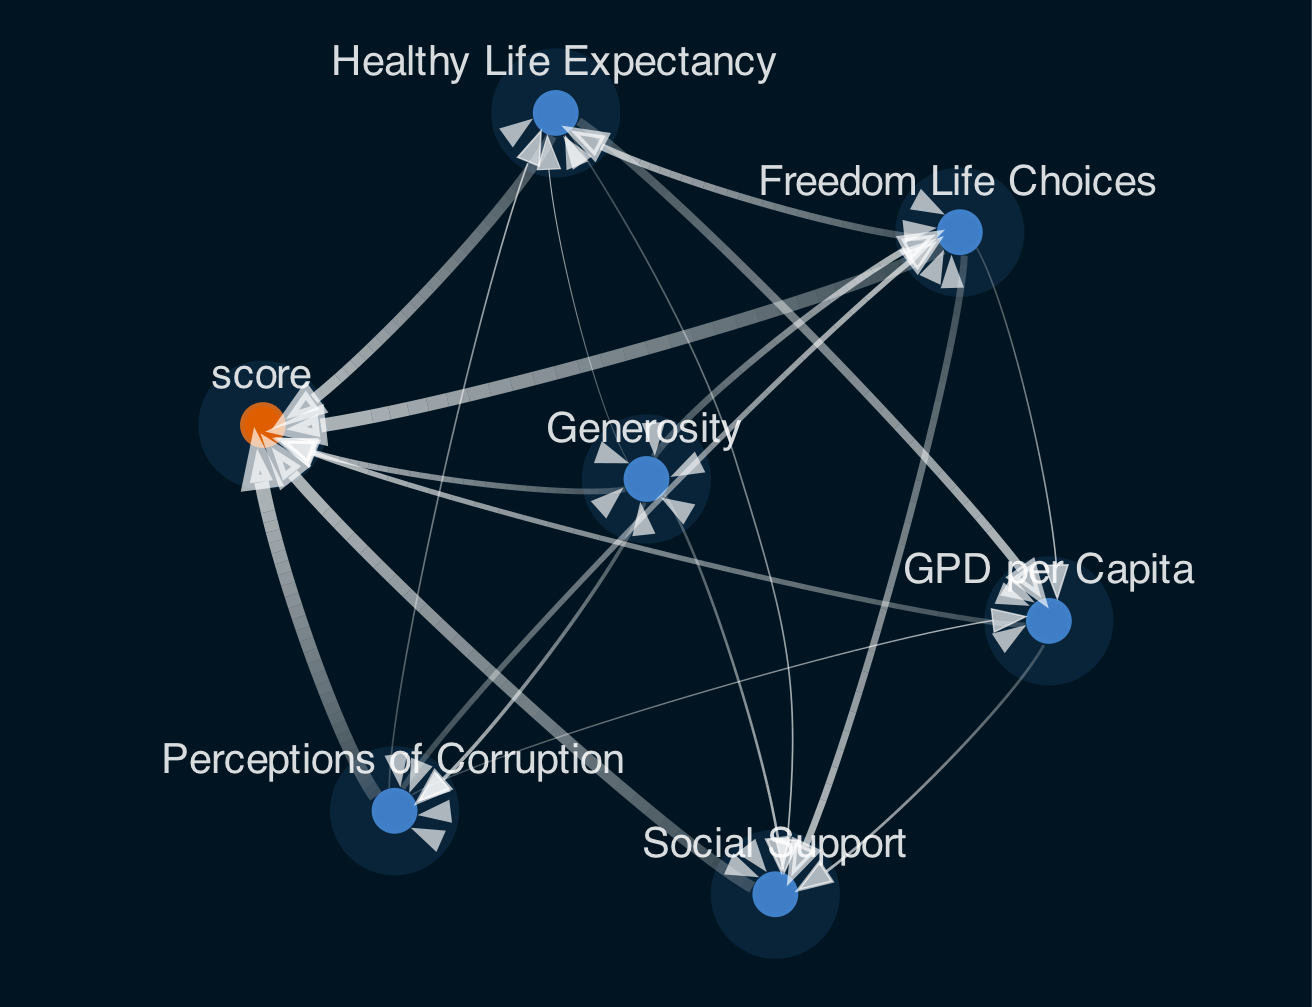

In [145]:
node_attributes = {
    node: {
        "fontsize": 10,
        "labelloc": "c",
    }
    for node in sm.nodes
}

edge_attributes = {
    (u, v): {
        "penwidth": w * 1.5,  # Setting edge thickness
        "weight": int(10 * w),  # Higher "weight"s mean shorter edges
        #"arrowsize": 2 - 2.0 * w,  # Avoid too large arrows
        "arrowtail": "dot",
    }
    for u, v, w in sm.edges(data="weight")
}

for node in sm.nodes:
    if "score" in node:  # We color nodes with "cost" in the name with a orange colour.
        node_attributes[node]["fillcolor"] = "#DF5F00"

viz = plot_structure(sm,
                     prog = "neato",
                     node_attributes=node_attributes,
                     edge_attributes=edge_attributes)

Image(viz.draw(
    format="png"
))